In [60]:
#NAIVE BAYES MODELLER:  Yüksek boyurlu veri setleri için basit sınıflandırma algoritmalarıdır. Ayar için az parametre kullanıldığındna dolayı hızlı çalışır. Bayes Teorisine dayanır. Bu derste 
# - Gaussian Naive Bayes tekniği , Çoklu Naive Bayes Tekniği , Hangi durumlarda kullanılır? işlicez.


In [61]:
#Sklearnde 3 tane Naive Bayes Tekniği vardır. Bunlar Gaussian, Multinomial, Bernoulli 
# - Gaussian Naive Bayes, sürekli verileri , Bernoulli  ikili sınıflar için, Multinomial çok kategorili sınıflar için kullanılır. Multinomial, Bernoulli  genellikle text verilerini sınıflandırmak için kullanılır. 

In [62]:
# - Gaussian Naive Bayes tekniği : Özniteliklerin normal dağıldığı varsayılır. Bütün öznitelikler sürekli olmalıdır.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

In [63]:
%matplotlib inline 

In [64]:
#grafikleri satır aralarında görmek için yazdık. 

In [65]:
from sklearn.datasets import make_blobs

In [66]:
X,y = make_blobs(100,2, centers = 2 , cluster_std = 1.5 )  # girdi ve çık verilerini X ve y değişkenlerine atayalım. 


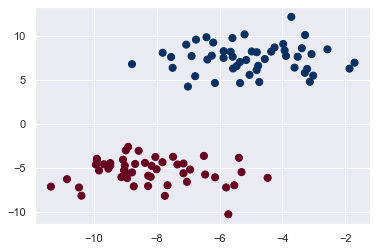

In [67]:
plt.scatter(X[: ,0], X[:,1], c=y , s = 50 , cmap= 'RdBu') #saçılım grafiği çizdik 

In [68]:
# burada öznitelikler arasında Gaussian ile veriyi sınıflandırdık. Her bir sınıftaki noktaların ort ve standart sapmasını kullanarak bir model kurabilirirz. 

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model=GaussianNB()

In [71]:
model.fit(X,y) #girdi ve çıktı verileri kullanarak modeli fit ettik.

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
#rastgele veriler üretelim ve bu verilerin sınıfını tahmine delim. 
rng=np.random.RandomState(0)
X_yeni = [6,-14]+[14,18]*rng.rand(1000,2)

In [73]:
#oluşturduğumuz verileri kurduğumuz modele göre tahmin edelim. 
y_yeni = model.predict(X_yeni)

(-11.875419881680724,
 -1.2054194141848202,
 -11.433575139028918,
 13.252207087077265)

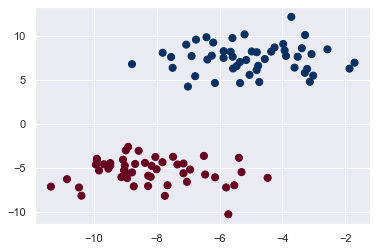

In [74]:
#yeni verilerin grafikte nerede olduğuna bakalım. 
plt.scatter(X[:,0],X[:,1], c=y , s = 50 , cmap='RdBu')
lim= plt.axis()
plt.scatter(X_yeni[:,0],X_yeni[:,1], c=y_yeni , s = 20 , cmap='RdBu',alpha = 0.2) 
# s nokta büyüklük , alpha = nokta görünüm 
plt.axis(lim)       
    

In [78]:
# Çoklu Naive Bayes : Gaussian Bayes gibi çalışır fakat bu modelde özniteliklerin çok kategorili old varsayılır. KEsilkli veriler için bu wsınıflandırma kullanılır. Çok kategorili Naive Bayes en sık  textlerin sınıflandırılmasında kullanılır. Yani öznitelikler textteki kelimelerin sayısı ile ilişkili ise kullanılır. 
from sklearn.datasets import fetch_20newsgroups 

In [80]:
data = fetch_20newsgroups

In [85]:
kategoriler = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']

In [86]:
train = fetch_20newsgroups(subset= 'train', categories = kategoriler )
test = fetch_20newsgroups(subset='test', categories = kategoriler ) 
# eğitim ve test verilerini oluşturduk 

In [88]:
print(train.data[5]) # eğitim verisindeki 5. testi görelim. Bu veri seti sınıflandırma ve kümeleme gibi makine öğrenmesi tekniklerinin test uygulamalarında kulanılan popüler veridir.  

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [90]:
# makine öğrenmesinde veri setinde bu veri setini kullanmak için her bir veri setindeki stringin içeriğini bi  sayısal vektöre çevirmemiz gerekiyor. 
from sklearn.feature_extraction.text import TfidfVectorizer 

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 

In [94]:
model= make_pipeline(TfidfVectorizer (), MultinomialNB()) # bu komut çalıştığında model değişkenş oluştu. 

In [95]:
model.fit(train.data , train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [96]:
# bu modeli kullanarak test verisindeki verileri tahmşne delim. 
etiketler = model.predict(test.data)

In [97]:
#modelin performansını değerlendirelim 
from sklearn.metrics import confusion_matrix

In [99]:
mat = confusion_matrix(test.target, etiketler)

Text(89.133125, 0.5, 'Tahmin etiketleri')

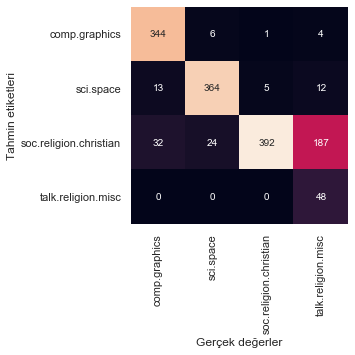

In [102]:
# gerçek ve tahmin değerlerin grafiğini çizelim.
sns.heatmap(mat.T, square = True , annot = True , fmt= 'd', cbar = False,
           xticklabels= train.target_names, yticklabels= train.target_names) 
#eksenleri isimlendirelim. 
plt.xlabel('Gerçek değerler')
plt.ylabel('Tahmin etiketleri') 
#grafikte 344, 364,392 doğru tahmin edilmiş 
# 187 de karışıklık yaşıyor. 
# 48 olan doğru tahmin edilmemiş 

In [103]:
#predict metodu ile bir stringin içeriğini tahmin etmek için fonksiyon oluşturalım. 
def predict_category(s, train = train , model = model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [105]:
predict_category('discussing islam vs atheism') # yazının hristiyanlık ile ilgili bir konu olduğu tahmin edildi. 

'soc.religion.christian'

In [106]:
#yazılan yazıların kategorilerini belirleyen bir fonksiyon oluşturmuş oldu. 

In [ ]:
# Naive Bayes Ne zaman kullanılır ? 
# Naive Bayes sınıflandırmasında veri hakkında katı varsayımlar old dolayı genellikler karmaşık verilerde kullanılmaz. 